# Regresija

Opazujemo, kako sta dve slučajni spremenljivki $X$ in $Y$ povezani.

## Regresijski premici
Odvisnost $X$ in $Y$ opišemo z regresijskimi premicami
$$Y = b_1X + a_1$$
in 
$$X = b_2Y + a_2$$
Parametra $b_1$ in $a_1$ lahko izrazimo s korelacijskim koeficientom in standardnim odklonom
$$b_1 = \frac{K(X,Y)}{\sigma_X^2} = r(X,Y)\frac{\sigma_Y^2}{\sigma_X^2}$$
in 
$$a_1 = E(Y)- b_1 E(X).$$
Podobno lahko izrazimo tudi parametra $a_2$ in $b_2$.
### Ocena za koeficiente regresijske premice na podlagi vzorca

Definiramo naslednje količine
$$C(X,Y) = \sum (x_i-\bar{x})(y_i - \bar{y})$$
in 
$$C(X)^2 = C(X,X)= \sum (x_i-\bar{x})^2$$
Potem lahko **ocene** za parametre $b_1$ in $a_1$ izrazimo kot
$$\hat{b}_1 = \frac{C(X,Y)}{C(X)^2}$$
in 
$$\hat{a}_1 = \bar{y} - \hat{b}_1\bar{x}$$ 

In [3]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [4]:
x = [1, 2, 3, 4, 5]
y = [2, 6, 7, 10, 10] 

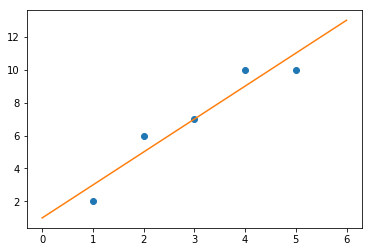

In [9]:
plot(x, y, 'o')
plot([0, 6], [1, 13])

In [9]:
print("Napoved za Y pri X=10 je enaka vrednosti {}".format(2*10+1))

Napoved za Y pri X=10 je enaka vrednosti 21


# Zveza med telesno višino in telesno težo


In [15]:
v = array([188, 190, 180, 194, 180, 172, 173, 172, 183, 180, 175])
t = array([108, 90, 95, 83, 73, 80, 60, 57, 66, 80, 70])

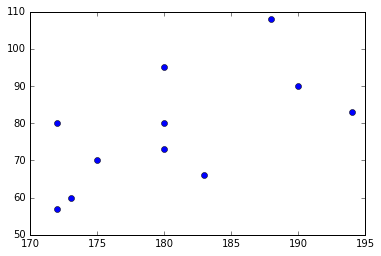

In [12]:
plot(v, t, 'o')

In [13]:
vp = sum(v)/len(v)
vp

180.63636363636363

In [14]:
tp = mean(t)
tp

78.36363636363636

In [20]:
CX2 = sum((v-vp)**2)
CXY = sum((v-vp)*(t-tp))
b = CXY/CX2

In [21]:
b

1.252246469833119

In [23]:
a = tp -b*vp
a

-147.83761232349161

In [24]:
# Napoved teže za višino 210cm

In [32]:
print("Pri telesni višini {} je povprečna teža enaka {}kg".format(210,b*210+a))

Pri telesni višini 210 je povprečna teža enaka 115.1341463414634kg


In [33]:
print("Pri telesni višini {} je povprečna teža enaka {}kg".format(160,b*160+a))

Pri telesni višini 160 je povprečna teža enaka 52.52182284980745kg


In [29]:
(t-(b*v+a))

array([ 20.41527599,  -0.08921694,  17.43324775, -12.09820282,
        -4.56675225,  12.45121951,  -8.80102696, -10.54878049,
       -15.32349166,   2.43324775,  -1.3055199 ])

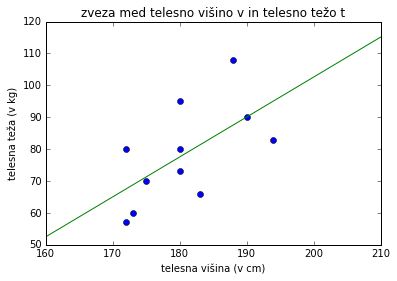

In [37]:
v0 = array([160, 210])
plot(v, t, 'o')
plot(v0, b*v0+a)
title("zveza med telesno višino v in telesno težo t")
xlabel("telesna višina (v cm)")
ylabel("telesna teža (v kg)")

# Indeks telesne teže
Boljši model odvisnosti telesne teže od višine je kvadratna odvisnost z [indeksom telesne mase](https://sl.wikipedia.org/wiki/Indeks_telesne_mase)

$$bmi = \frac{m}{(v/100)^2}$$
s katerim lahko opišemo odvisnost telesne mase kot 
$$m = bmi (v/100)^2$$
Za oceno normalnega $bmi$ lahko uporabimo [metodo najmanjših kvadratov](https://en.wikipedia.org/wiki/Least_squares)

In [45]:
v_100 = (v/100)**2
v_100p = mean(v_100)
bmi_p = sum(v_100*t)/sum((v_100)**2)
print("ocena za povprečen bmi je {}".format(bmi_p))

ocena za povprečen bmi je 24.043096246396047


In [41]:
bmi = t/(v_100)

In [42]:
bmi

array([ 30.55681304,  24.93074792,  29.32098765,  22.05335317,
        22.5308642 ,  27.04164413,  20.04744562,  19.26717144,
        19.70796381,  24.69135802,  22.85714286])

In [43]:
tp - bmi_p*v_100p

-33.268173632220339

In [44]:
v_100p

3.2681

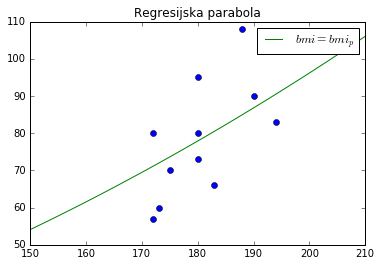

In [54]:
x = linspace(150, 210)
plot(v, t, 'o')
plot(x, bmi_p*(x/100)**2, label="$bmi=bmi_p$")
legend()
title("Regresijska parabola")

# Uporaba z uporabo knjižnice scipy in sympy

In [13]:
from scipy.stats import pearsonr
from statistics import stdev, mean
x = [1,2,3,4,5]
y = [2,6,7,10,10]
r = pearsonr(x,y)[0]
sy = stdev(y)
sx = stdev(x)
mx = mean(x)
my = mean(y)

Narišimo točke na graf.

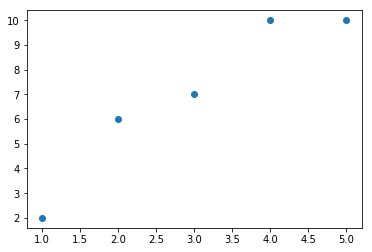

In [14]:
plot(x, y, 'o')

In [16]:
from sympy import Symbol, Eq, solve
yy = Symbol('y')
xx = Symbol('x')
eq = Eq(yy - my, r*sy/sx*(xx-mx))
result = solve(eq, yy)[0]
print("y =",result)
print("y(10) =",result.subs(x,10))

y = 2.0*x + 1.0
y(10) = 2.0*x + 1.0


Narišimo na zgornji graf še izračunano regresijsko premico.

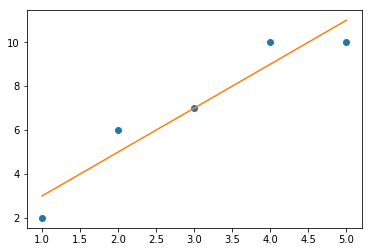

In [19]:
px = [min(x), max(x)]
py = [result.subs(xx, x) for x in px] 
plot(x, y, 'o')
plot(px, py)

Izračunajte še vzorčno kovarianco za spremenljivki $X$ in $Y$.

In [10]:
from numpy import cov, asarray
x = [1,2,3,4,5]
y = [2,6,7,10,10]
m = cov(x, y)
m

array([[ 2.5,  5. ],
       [ 5. , 11. ]])

In [77]:
stdev(x)**2, stdev(y)**2

(2.5000000000000004, 11.0)

In [80]:
print("Vzorčna kovarianca X in Y je: {}.".format(m[0][1]))

Vzorčna kovarianca X in Y je: 5.0.
